### Predict the likelihood of a customer buying personal loans.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
%matplotlib inline

# The determination whether to issue a warning message is controlled by the warning filter,
# which is a sequence of matching rules and actions. 
# Rules can be added to the filter by calling filterwarnings() and 
# reset to its default state by calling resetwarnings().
warnings.filterwarnings('ignore')

# color_codes: bool .If True and palette is a seaborn palette, remap the shorthand color codes (e.g. “b”, “g”, “r”, etc.) to the colors from this palette.
sns.set(style='white',color_codes=True)
sns.set_palette('Set1')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.txt to Bank_Personal_Loan_Modelling.txt


In [54]:
import io
df = pd.read_csv(io.StringIO(uploaded['Bank_Personal_Loan_Modelling.txt'].decode('utf-8')))
df.rename(columns = {'ZIP Code' : 'ZIP_Code', 'CCAvg' : 'CC_Avg', 'Personal Loan':'Personal_Loan', 'Securities Account' : 'Securities_Account', 'CD Account':'CD_Account', 'CreditCard' : 'Credit_Card'}, inplace=True) 
df.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CC_Avg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,Credit_Card
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [55]:
df.shape

(5000, 14)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CC_Avg              5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  Credit_Card         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [57]:
df.isna().apply(pd.value_counts)

,ID,Age,Experience,Income,ZIP_Code,Family,CC_Avg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,Credit_Card
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


* It appears to be complete without any null values.
* All the variable values are either integers or continuous numbers.

#### Data distribution in each attribute

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CC_Avg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


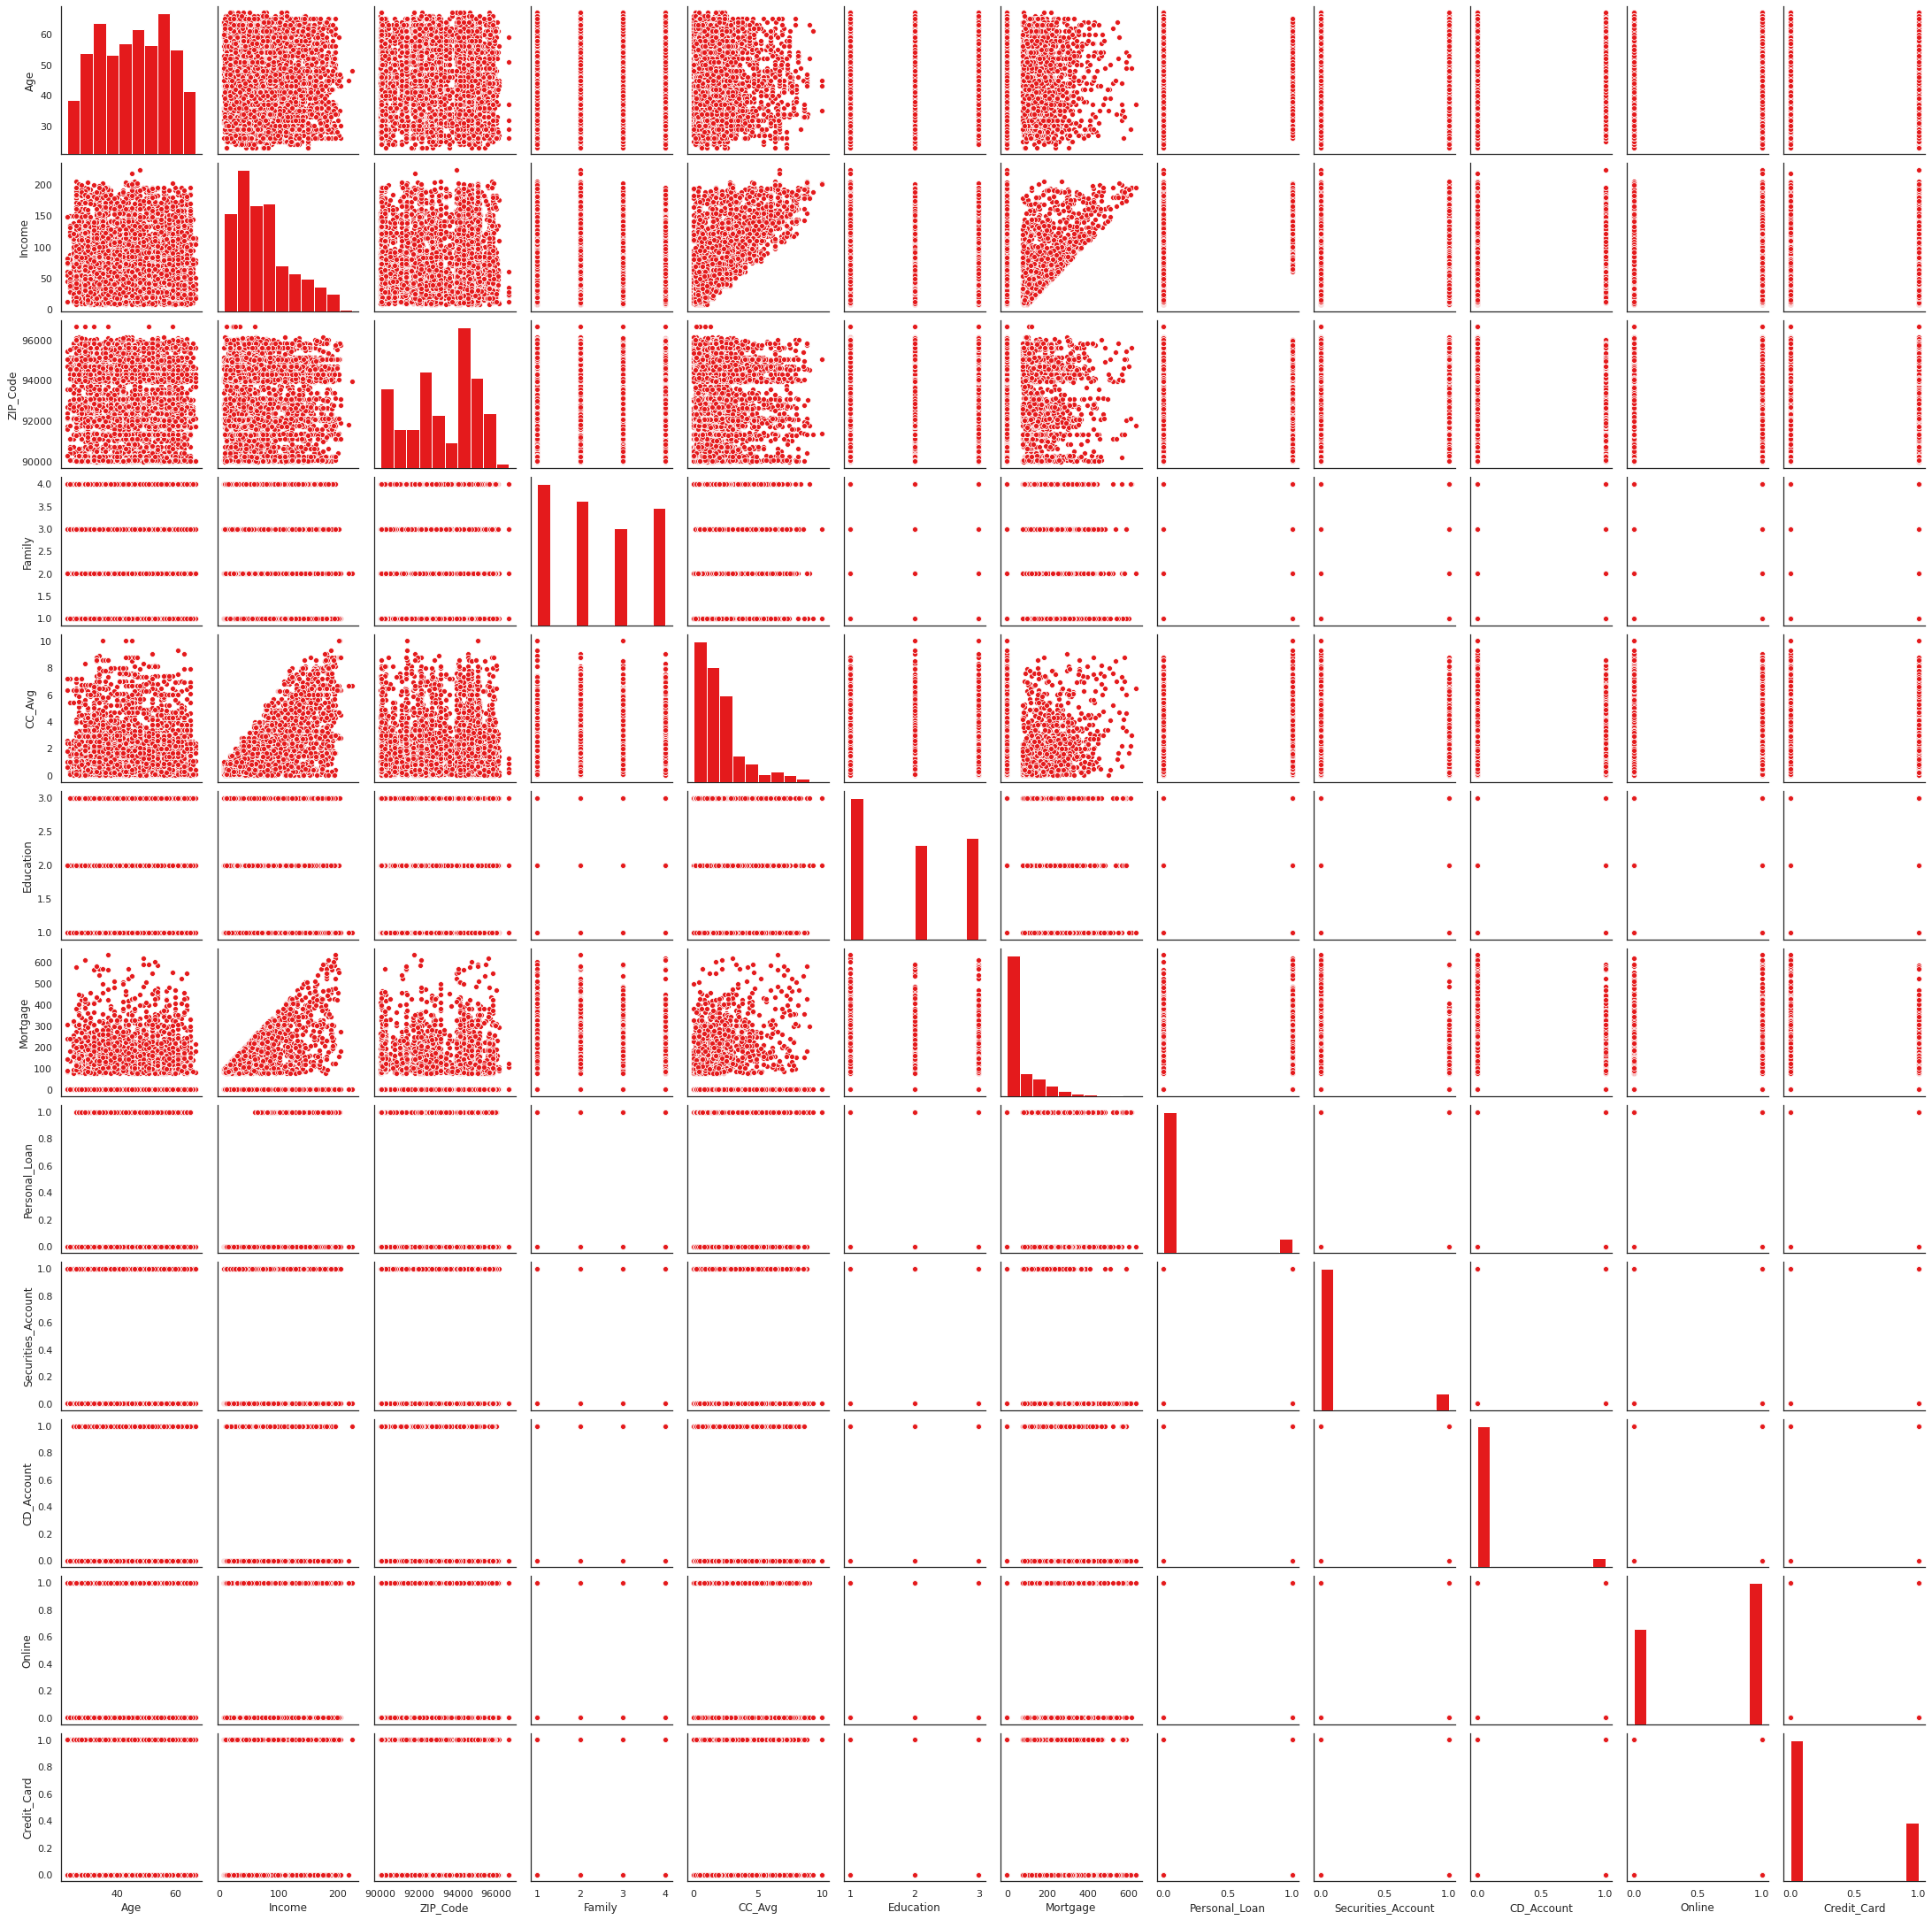

In [75]:
sns.pairplot(df)

Pearson correlation coefficient, or the bivariate correlation, is a statistic that measures linear correlation between two variables X and Y. 

It has a value between +1 and −1.

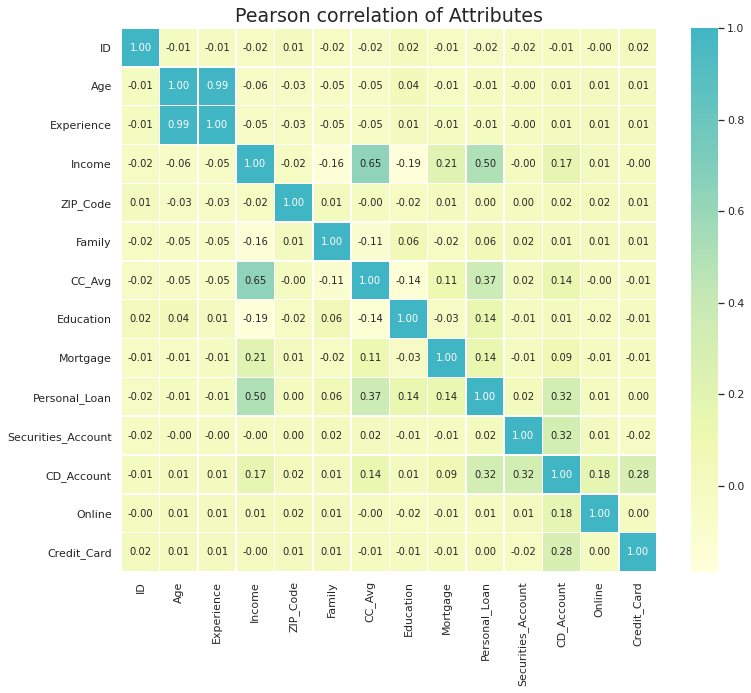

In [60]:
corr = df.corr()

plt.figure(figsize=(12,10))
# y float: Vertical axes loation for the title (1.0 is the top).
plt.title('Pearson correlation of Attributes', y = 1, size = 19)
sns.heatmap(corr, cmap = 'YlGnBu', annot=True, linewidths=.5, fmt= '.2f', center = 1) # fmtstring: String formatting code to use when adding annotations.
# other cmap options: 'Blues', 'Greens', 'BuPu'

##### **Study of data**
* ID: This is customer ID with the bank starting from 1 to 5000 and will not contribute in any way to predict the likelihood of a customer buying personal loans. Hence this ID column can be dropped.
* Age: Customer's age, a discrete variable from 23 to 67 years, has a very high Pearson correlation (ρ = 0.99) with the 'Experience' of customer. Hence one of it can be considered as a redundant variable.
* Experience: Customers' years of professional experience, also a discrete variable from -3 to 43, has some negative values in data that is logically impossible and in relation to age collecting values for experience from customer can be challenging. Hence Experience can also be dropped.
* Income: Annual income of the customer is right skewed with a range of 8,000 to 2,24,000 dollars. It has relatively better Pearson correlation (ρ = 0.50) with Personal Loan, which states if the customer accepted personal loans in the last campaign. This can be a good predictor of the likelihood of a customer buying personal loans. It indicates majority of the customers earn between 28,000 to 120,000 dollars.
* ZIP_Code: Home Address ZIP code may contribute to this model in cases where data is observed to be concentrated in a locality. Further study is required to understand its importance.
* Family: Family size of the customer, also a discrete variable from 1 to 4, can also be a good indicator of liability along with other parameters.
* CC_Avg: Average spending on credit cards per month, is highly right skewed with a range of 0 to 10,000 dollars and mean of 1,937. It has relatively good Pearson correlation (ρ = 0.37) with Personal Loan as well. This can also be a good indicator of liability to the customer and a good predictor of the likelihood of a customer buying personal loans.
* Education: Education Level. 1: Undergrad, 2: Graduate and 3: Advanced/Professional is an ordinal value. Data appears to be indicating that majority of the customers are Undergrads.
* Mortgage: Value of house mortgage if availed by the customer, is highly right skewed with a range of 0 to 6,35,000 dollars. A median of 0 and mean of 56,498 indicates majority of the customers have not availed a house mortgage.
* Personal_Loan: Acceptance of the personal loan offered in the last campaign is a binary categorical variable indicating the customer accepted the personal loan or not. Mean indicating only 9.6% accepted the offer. This can be the target variable. There seems to be a heavy class imbalance in here that might create a biased model.
* Securities_Account: Customer has a securities account with the bank or not is a binary categorical variable. Mean indicating 10.44% has a securities account.
* CD_Account: Customer has a certificate of deposit (CD) account with the bank or not is also a binary categorical variable. Mean indicating 6.04% has a CD account. It has relatively good Pearson correlation (ρ = 0.32) with Personal Loan as well.
* Online: Customer uses internet banking facilities or not is also a binary categorical variable. Mean indicating 59.68% uses internet banking facilities.
* Credit_Card: Customer uses a credit card issued by Universal Bank or not is also a binary categorical variable. Mean indicating 29.4% uses credit card.

In [61]:
print("Negative Experience Count:", df[df['Experience'] < 0]['Experience'].count())

Negative Experience Count: 52


We cannot have negative Experience, so we will drop ID and Experience columns

In [62]:
df.drop(['Experience','ID'],axis=1,inplace=True)

Let's check the columns left in Dataframe

In [63]:
df.columns

Index(['Age', 'Income', 'ZIP_Code', 'Family', 'CC_Avg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'Credit_Card'],
      dtype='object')

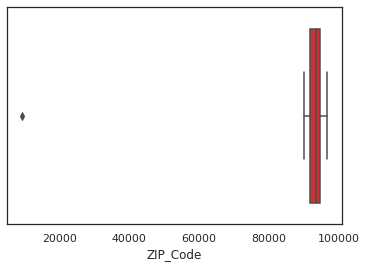

In [64]:
sns.boxplot(df['ZIP_Code'])

We can see we have an outlier in ZIP_Code column!

In [65]:
print(df[df['ZIP_Code']<20000])

     Age  Income  ZIP_Code  ...  CD_Account  Online  Credit_Card
384   51      21      9307  ...           0       1            1

[1 rows x 12 columns]


In [66]:
# Lets drop that row as ZIP code 9307 is not a valid US zip code.
df.drop(index = 384, inplace=True)

Checking concentration of Income in ZIP codes and relation to Personal Loan


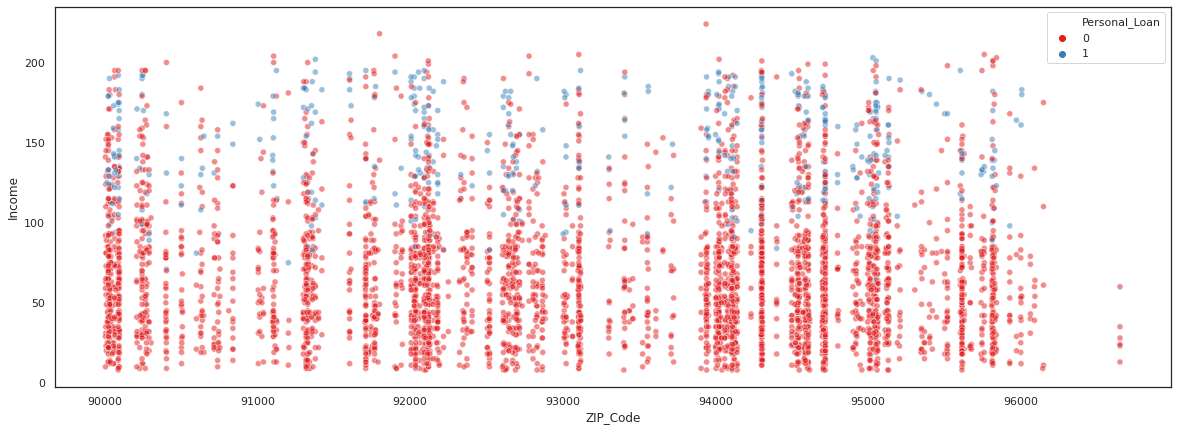

In [67]:
plt.figure(figsize=(20,7))
sns.scatterplot(x = df['ZIP_Code'], y = df['Income'], hue = df['Personal_Loan'], alpha = 0.5)
print("Checking concentration of Income in ZIP codes and relation to Personal Loan")

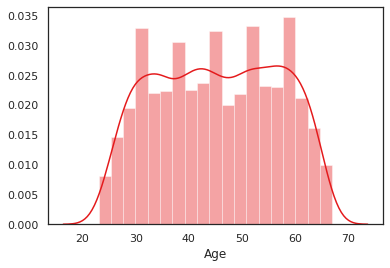

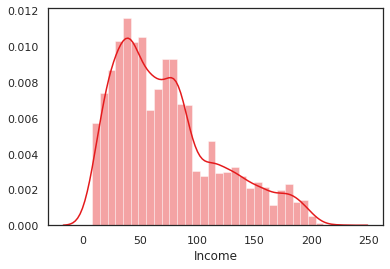

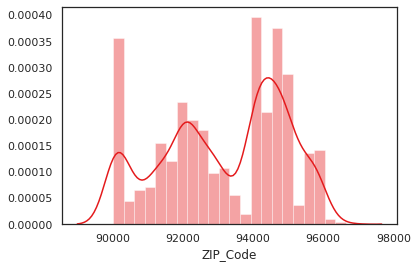

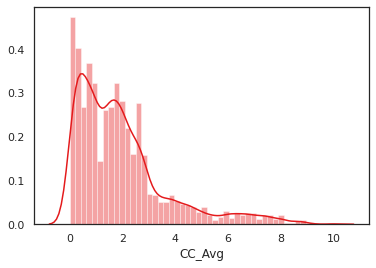

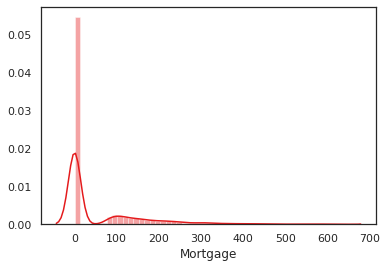

In [72]:
continuous_col = ['Age', 'Income', 'ZIP_Code', 'CC_Avg',
       'Mortgage']
for col in continuous_col:
  sns.distplot(df[col])
  plt.show()

Let's count the number of personal loans given

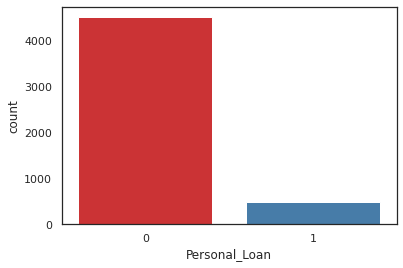

In [95]:
sns.countplot(df['Personal_Loan'],label="Count")

In [97]:
y = df['Personal_Loan']
x = df.drop('Personal_Loan',axis=1)

In [98]:
x.columns

Index(['Age', 'Income', 'ZIP_Code', 'Family', 'CC_Avg', 'Education',
       'Mortgage', 'Securities_Account', 'CD_Account', 'Online',
       'Credit_Card'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

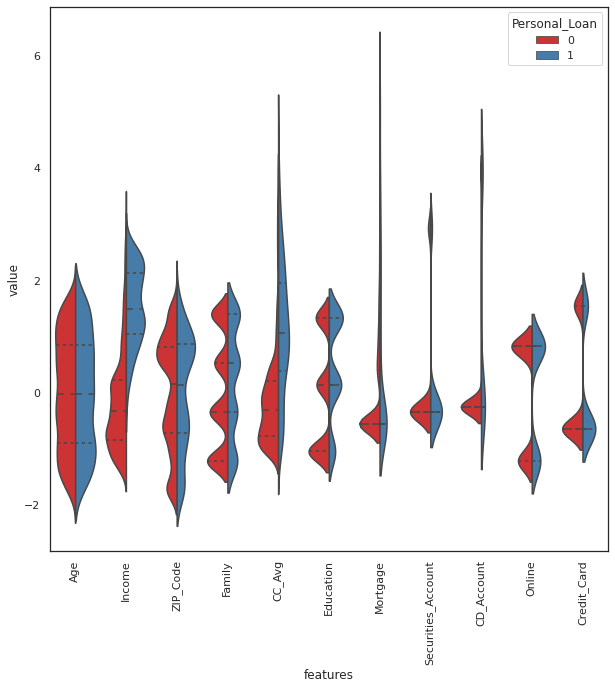

In [99]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:11]],axis=1)
data = pd.melt(data,id_vars="Personal_Loan",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Personal_Loan", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In Age feature, median of the Personal loan Accepted and Not Accepted does not looks like separated so it does not gives good information for classification.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

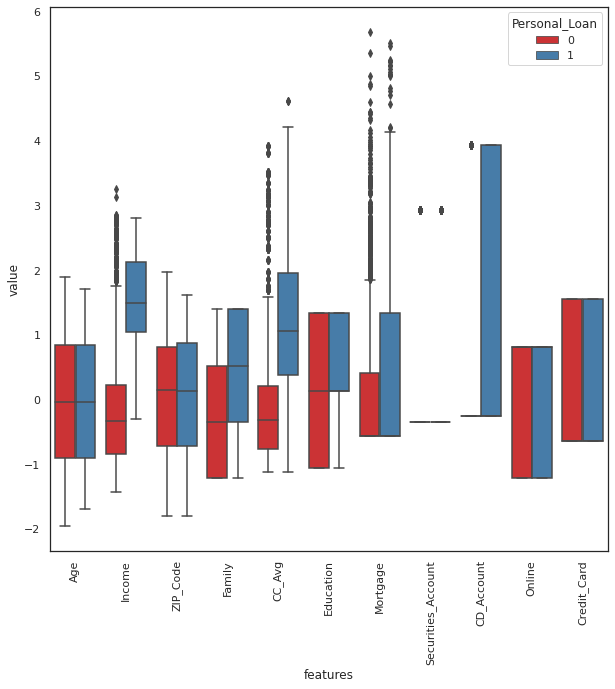

In [100]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Personal_Loan", data=data)
plt.xticks(rotation=90)

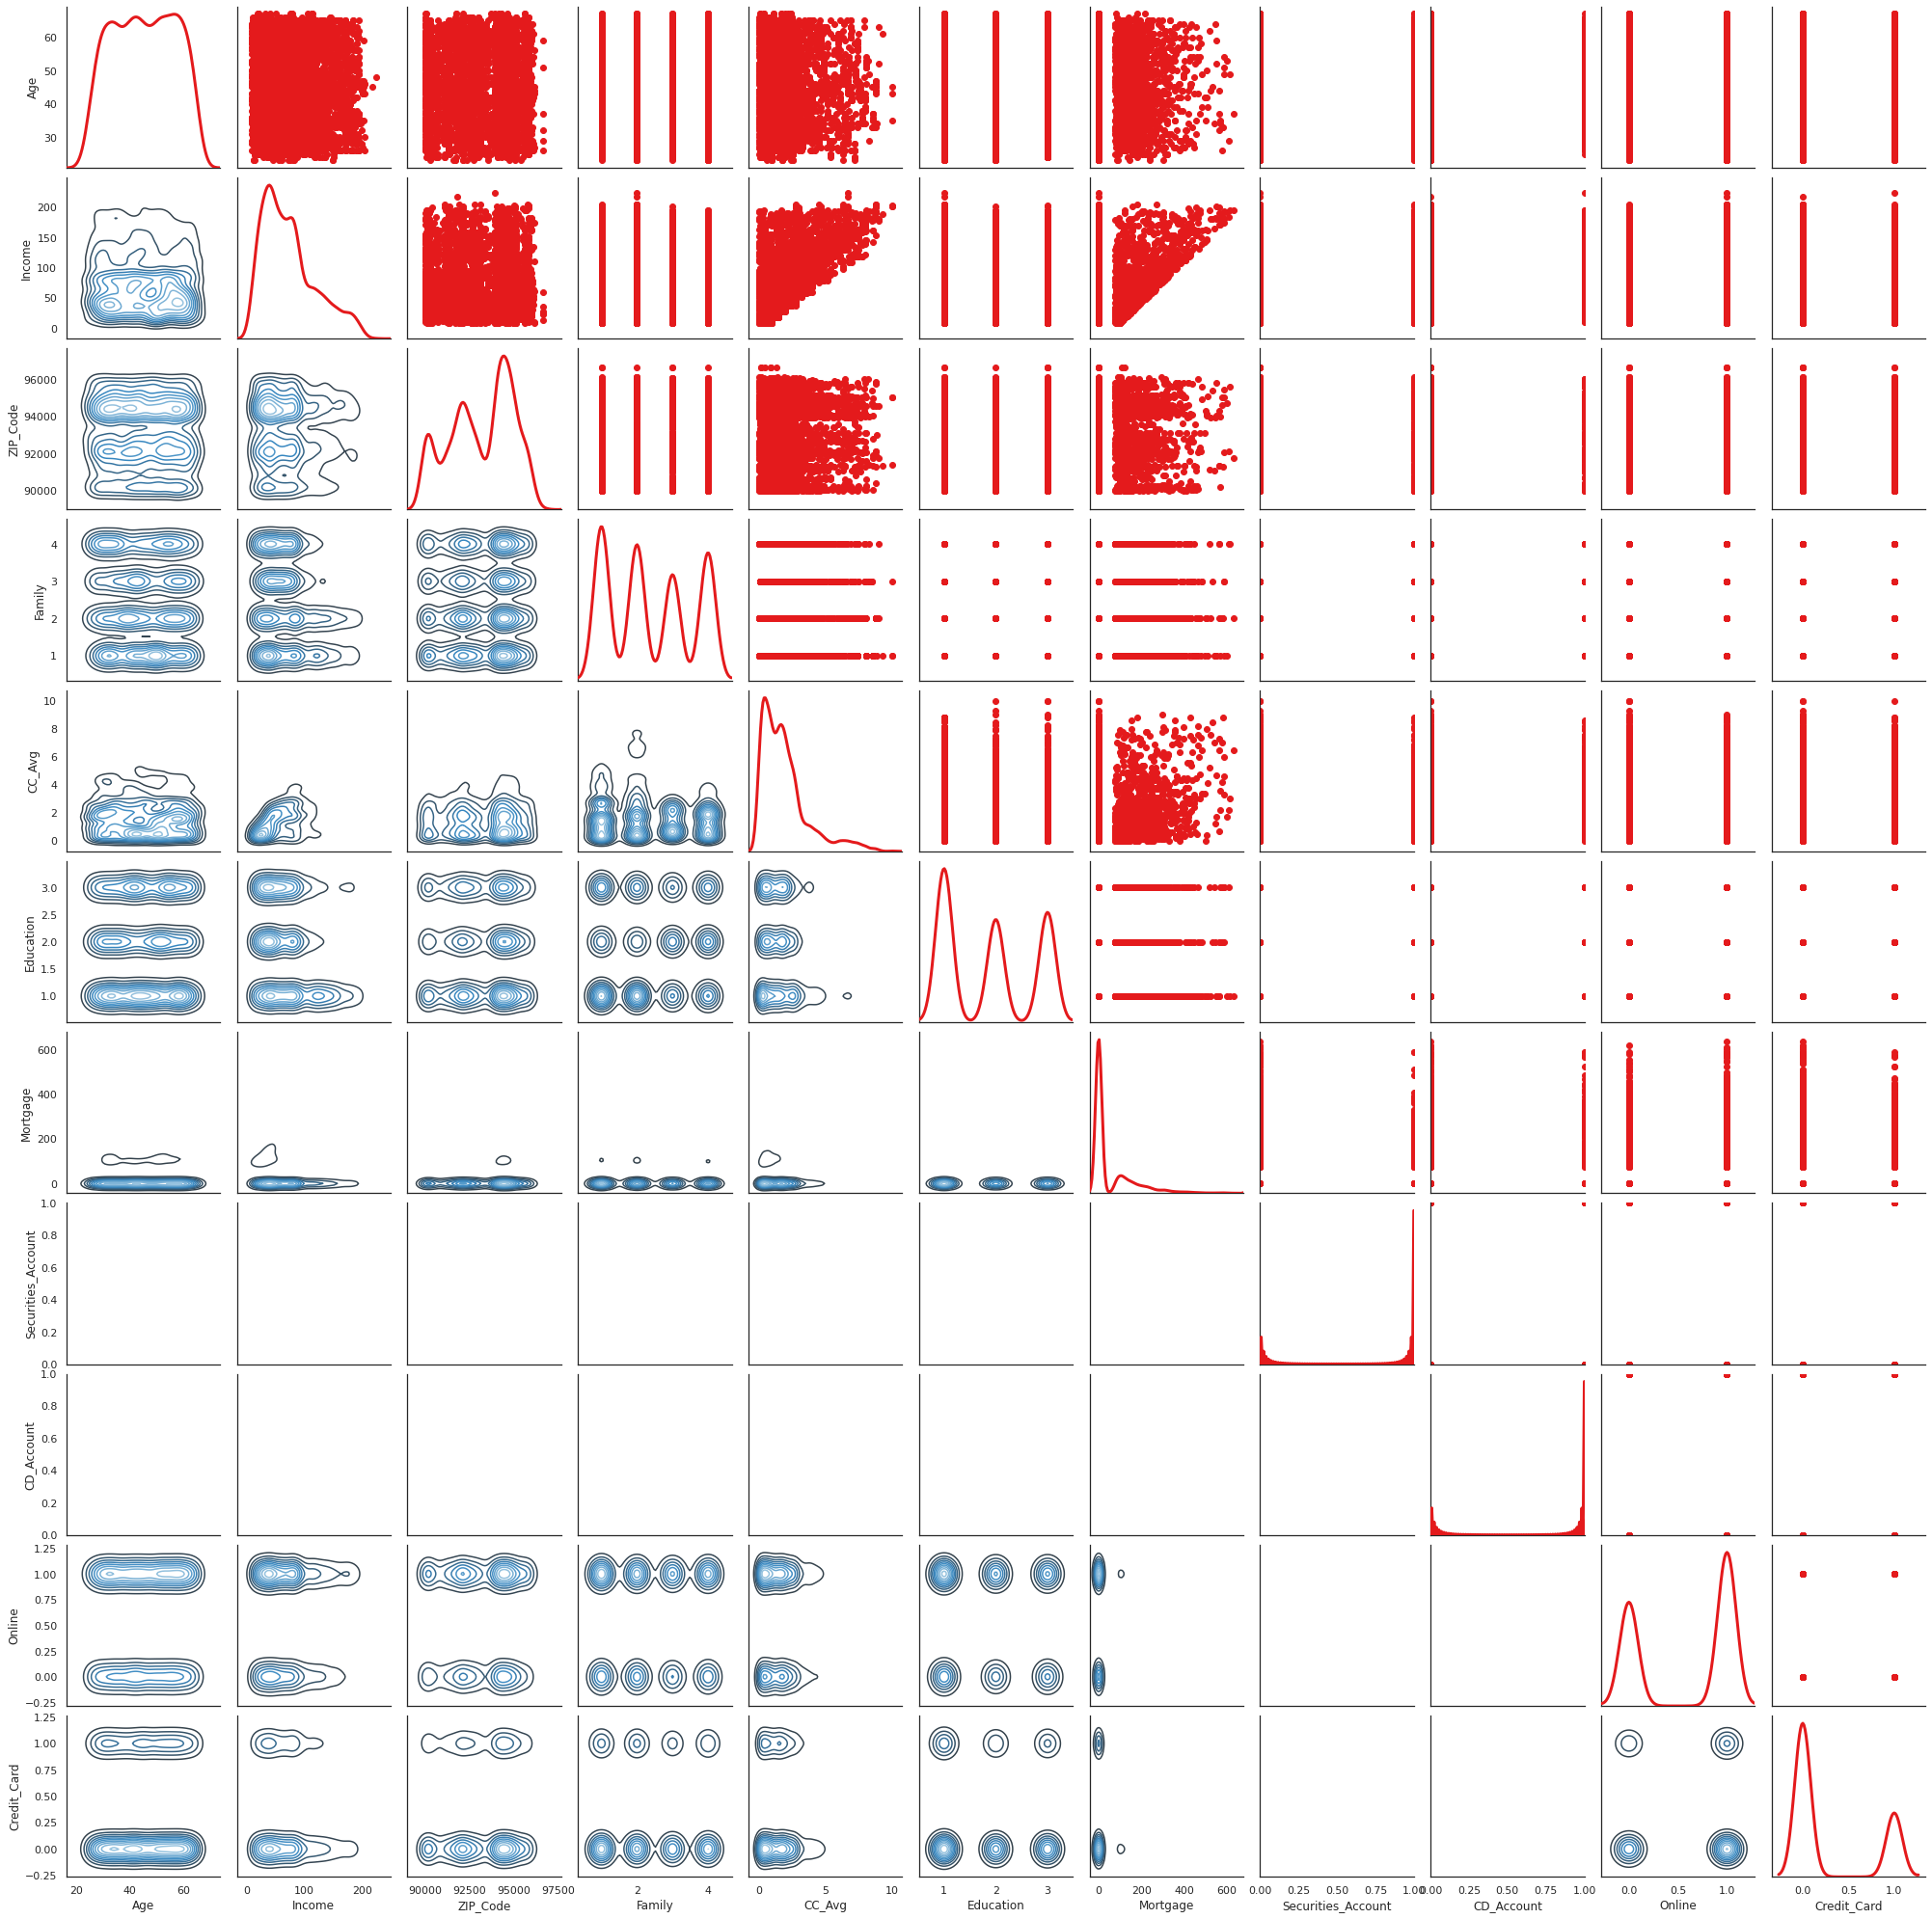

In [101]:
g = sns.PairGrid(x, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Income vs Mortgage vs CC Avg vs Personal_Loan


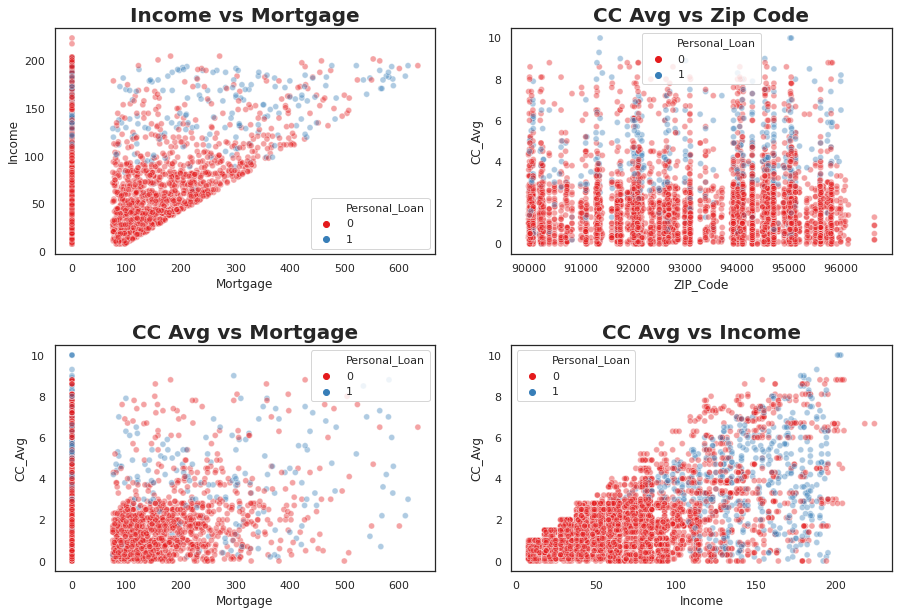

In [109]:
f, ax = plt.subplots(2, 2, figsize = (15,10))
plt.subplots_adjust(hspace=0.4)

sns.scatterplot(x = df['Mortgage'], y = df['Income'], hue = df['Personal_Loan'], alpha=0.4,ax = ax[0,0])
ax[0,0].set_title("Income vs Mortgage", size = 20, weight = "bold")
sns.scatterplot(x = df['ZIP_Code'],y=df['CC_Avg'], hue = df['Personal_Loan'], alpha=0.4, ax = ax[0,1])
ax[0,1].set_title("CC Avg vs Zip Code", size = 20, weight = "bold")
sns.scatterplot(x = df['Mortgage'], y = df['CC_Avg'], hue = df['Personal_Loan'], alpha=0.4,ax = ax[1,0])
ax[1,0].set_title("CC Avg vs Mortgage", size = 20, weight = "bold")
sns.scatterplot(x = df['Income'], y = df['CC_Avg'], hue = df['Personal_Loan'], alpha=0.4,ax = ax[1,1])
ax[1,1].set_title("CC Avg vs Income", size = 20, weight = "bold")
print("Income vs Mortgage vs CC Avg vs Personal_Loan")

#### Let's Split our Dataset for Training and Testing

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [111]:
X = df.drop(['Personal_Loan'], axis=1)
y = df[['Personal_Loan']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [112]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

To predict the best algorithm with best accuracy we can install **lazypredict**

In [113]:
!pip install lazypredict

In [114]:
from lazypredict.Supervised import LazyClassifier

In [115]:
clf = LazyClassifier(ignore_warnings=True)
model, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 30/30 [00:04<00:00,  6.93it/s]


In [116]:
model

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.99,0.96,0.96,0.99,0.02
BaggingClassifier,0.99,0.95,0.95,0.99,0.08
XGBClassifier,0.99,0.95,0.95,0.99,0.31
LGBMClassifier,0.99,0.95,0.95,0.99,0.16
RandomForestClassifier,0.99,0.94,0.94,0.99,0.38
ExtraTreesClassifier,0.98,0.92,0.92,0.98,0.27
AdaBoostClassifier,0.97,0.90,0.90,0.97,0.22
ExtraTreeClassifier,0.96,0.88,0.88,0.96,0.02
SVC,0.97,0.86,0.86,0.97,0.17


We can see that **Decision Tree Classifier** did best in classification task.

In [120]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.tree import export_graphviz

In [118]:
final_model = DecisionTreeClassifier(criterion='entropy',max_depth=4, min_samples_split=2)
final_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

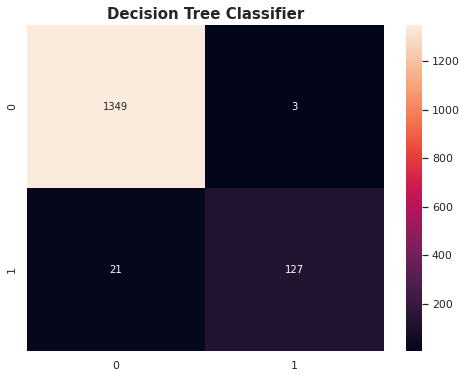

In [134]:
from sklearn.metrics import confusion_matrix
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_title("Decision Tree Classifier", size = 15, weight = "bold")
cm = confusion_matrix(y_test,final_model.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

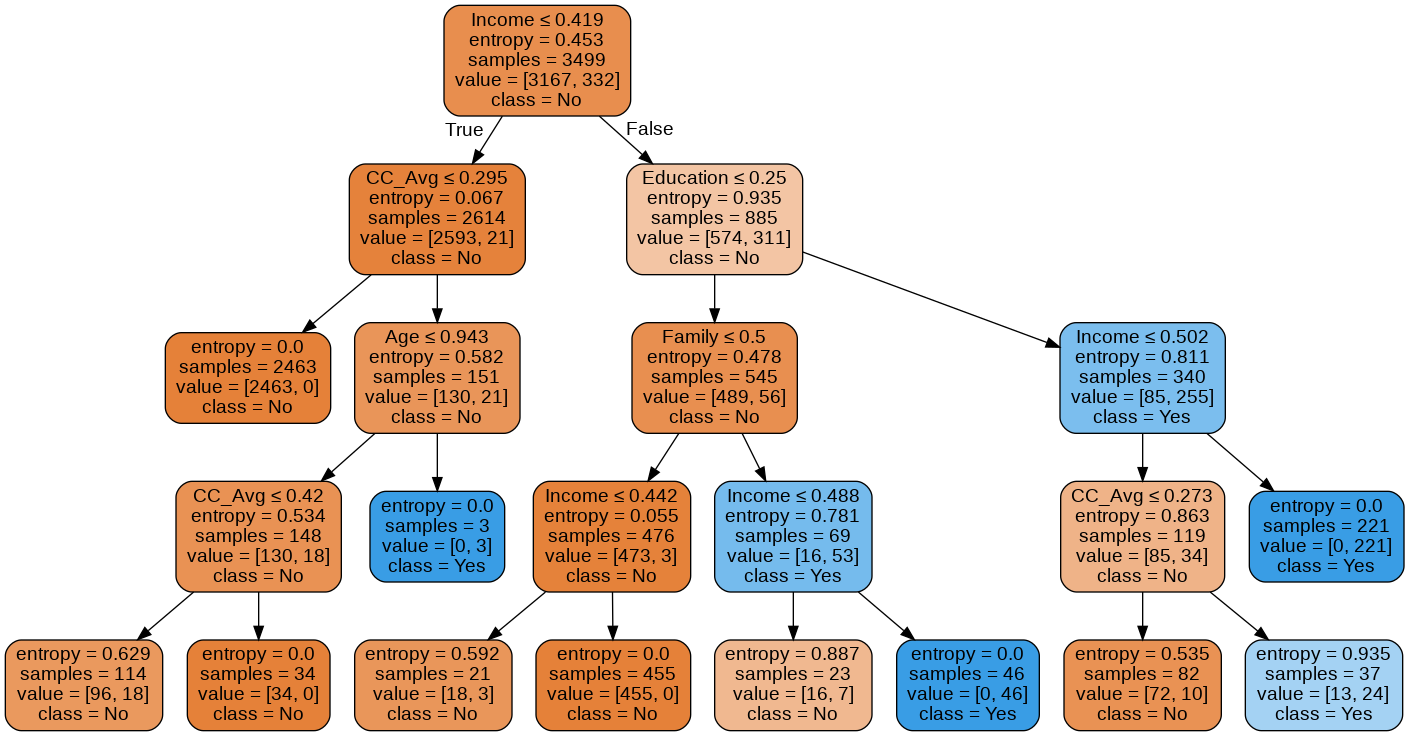

In [121]:
dot_data = StringIO() 
features = ['Age', 'Income', 'ZIP_Code', 'Family', 'CC_Avg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'Credit_Card']
classes = ['No', 'Yes']
export_graphviz(final_model, out_file=dot_data, feature_names=features, class_names=classes, filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())